In [57]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir

from tensorflow.keras.preprocessing import sequence
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Conv1D, MaxPooling1D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import keras
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [58]:
from keras import backend as K
K.clear_session()

from keras.layers import Dense,BatchNormalization,Dropout
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint
from keras.utils import to_categorical

from keras import regularizers
from collections import Counter
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from xgboost import XGBClassifier

from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [3]:
df1 = pd.read_csv(r'C:\Users\monis\Desktop\ML-Ang\Datasets\HoneyWell_Hackathon\OneDrive_1_2-26-2021\Voltage_L1_train.csv')
df2 = pd.read_csv(r'C:\Users\monis\Desktop\ML-Ang\Datasets\HoneyWell_Hackathon\OneDrive_1_2-26-2021\Voltage_L1_test.csv')

In [4]:
df1.columns = np.arange(len(df1.columns))
df2.columns = np.arange(len(df2.columns))

In [5]:
df1.dropna(how='all', inplace = True)
#df2.dropna(how='all', inplace = True)
print(df1.shape)
print(df2.shape)
df1.head()

(5999, 256)
(3599, 256)


,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,573.652486,1003.343736,1588.404525,2317.576741,2804.364311,3225.322510,3662.821690,4174.627969,4656.244143,4939.070130,...,-4650.282434,-4228.581226,-3865.609932,-3395.654756,-2933.680470,-2322.450904,-1841.562453,-1282.042025,-601.968217,-156.848367
1,4757.365183,5264.598912,5428.642486,5650.413073,5939.710012,5911.948067,6147.642171,6076.921501,5958.797444,6053.817701,...,-280.360872,323.325836,861.103019,1415.929276,2007.692919,2561.130303,2960.282598,3619.932691,4008.288701,4422.229911
2,4242.144824,4644.679402,5013.356532,5229.417051,5534.898007,5797.190678,5930.658682,5960.014599,6055.336310,6103.707793,...,-1256.270585,-616.527428,-67.068193,549.016676,1099.652199,1697.572166,2239.961604,2776.876479,3248.638662,3807.665149
3,2077.819247,2561.679246,3085.653813,3545.905160,4023.421592,4496.705157,4809.079868,5186.298840,5453.627533,5737.354699,...,-3557.345152,-3017.951179,-2596.647329,-1996.266675,-1467.203661,-885.101101,-329.685256,304.222722,935.528504,1460.127297
4,3599.645319,4099.944762,4499.282469,4897.875855,5120.077118,5402.227743,5694.801362,5928.683099,5981.616502,6052.006904,...,-2020.240712,-1388.704968,-849.731284,-232.632694,341.406093,854.579135,1528.023058,2002.557438,2576.468343,3036.303600


In [7]:
t1 = pd.read_csv(r'C:\Users\monis\Desktop\ML-Ang\Datasets\HoneyWell_Hackathon\OneDrive_1_2-26-2021\output_train.csv')
t2 = pd.read_csv(r'C:\Users\monis\Desktop\ML-Ang\Datasets\HoneyWell_Hackathon\OneDrive_1_2-26-2021\output_test.csv')

In [8]:
t1.columns = ['target']
t2.columns = ['target']
print(t1.shape)
print(t2.shape)
df1['target'] = t1
df2['target'] = t2

(5999, 1)
(3599, 1)


In [9]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,target
count,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,...,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000
mean,2724.849156,3185.770469,3544.969353,3947.709357,4249.735481,4509.632122,4802.947871,5114.016305,5132.770284,5346.220080,...,-1945.342559,-1415.727240,-1023.829156,-327.571997,94.179788,614.550399,1088.761067,1662.400798,2074.986987,3.500417
std,1401.312059,1323.660192,1251.228291,1141.184078,1047.381443,942.996830,817.425047,676.144046,620.244368,472.550458,...,1487.105965,1536.695688,1564.588316,1590.101809,1593.744809,1591.564465,1564.580127,1526.235162,1476.272926,1.707805
min,7.262860,385.980891,775.625243,1385.756620,1740.391212,2234.895090,2767.024727,3264.000188,3524.459163,3900.544325,...,-4629.714032,-4233.265710,-3792.399698,-3326.994658,-2820.922481,-2356.270922,-1892.557687,-1384.976676,-802.062281,1.000000
25%,1557.738178,2107.644962,2532.216839,3049.940982,3443.401039,3797.774653,4210.798635,4628.580980,4744.722755,5044.231724,...,-3229.576837,-2749.029955,-2362.655083,-1683.959393,-1272.724943,-752.721400,-225.447922,377.091717,857.418113,2.000000
50%,2826.465290,3293.945828,3666.253960,4093.769284,4387.454585,4654.817178,4951.354994,5225.126313,5147.138692,5382.547693,...,-2041.445383,-1475.021663,-1073.214096,-355.157286,73.283126,635.897381,1098.156111,1716.946597,2133.012880,4.000000
75%,3963.225857,4355.132232,4620.156306,4929.741884,5102.596151,5232.110349,5386.120990,5627.831236,5599.086993,5680.702877,...,-670.709048,-90.623127,314.137602,1032.457475,1476.878236,1988.458274,2454.675182,2990.544060,3363.288496,5.000000
max,6411.869978,6091.892089,8200.995314,8037.622359,8208.441229,8303.706356,8573.907487,8738.820320,8838.097165,8421.712927,...,2095.599446,3408.422940,3997.133868,3974.105045,4222.552116,4169.650955,6525.291747,4804.683362,4893.099198,6.000000


In [10]:
df3 = df1.append(df2, ignore_index=True)
class1 = df3[df3['target']==1]
class2 = df3[df3['target']==2]
class3 = df3[df3['target']==3]
class4 = df3[df3['target']==4]
class5 = df3[df3['target']==5]
print(df3.shape)
df3.head()

(9598, 257)


,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,target
0,573.652486,1003.343736,1588.404525,2317.576741,2804.364311,3225.322510,3662.821690,4174.627969,4656.244143,4939.070130,...,-4228.581226,-3865.609932,-3395.654756,-2933.680470,-2322.450904,-1841.562453,-1282.042025,-601.968217,-156.848367,1
1,4757.365183,5264.598912,5428.642486,5650.413073,5939.710012,5911.948067,6147.642171,6076.921501,5958.797444,6053.817701,...,323.325836,861.103019,1415.929276,2007.692919,2561.130303,2960.282598,3619.932691,4008.288701,4422.229911,1
2,4242.144824,4644.679402,5013.356532,5229.417051,5534.898007,5797.190678,5930.658682,5960.014599,6055.336310,6103.707793,...,-616.527428,-67.068193,549.016676,1099.652199,1697.572166,2239.961604,2776.876479,3248.638662,3807.665149,1
3,2077.819247,2561.679246,3085.653813,3545.905160,4023.421592,4496.705157,4809.079868,5186.298840,5453.627533,5737.354699,...,-3017.951179,-2596.647329,-1996.266675,-1467.203661,-885.101101,-329.685256,304.222722,935.528504,1460.127297,1
4,3599.645319,4099.944762,4499.282469,4897.875855,5120.077118,5402.227743,5694.801362,5928.683099,5981.616502,6052.006904,...,-1388.704968,-849.731284,-232.632694,341.406093,854.579135,1528.023058,2002.557438,2576.468343,3036.303600,1


In [28]:
X = df3.iloc[:,0:256]
y = df3['target']

In [29]:
X

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,573.652486,1003.343736,1588.404525,2317.576741,2804.364311,3225.322510,3662.821690,4174.627969,4656.244143,4939.070130,...,-4650.282434,-4228.581226,-3865.609932,-3395.654756,-2933.680470,-2322.450904,-1841.562453,-1282.042025,-601.968217,-156.848367
1,4757.365183,5264.598912,5428.642486,5650.413073,5939.710012,5911.948067,6147.642171,6076.921501,5958.797444,6053.817701,...,-280.360872,323.325836,861.103019,1415.929276,2007.692919,2561.130303,2960.282598,3619.932691,4008.288701,4422.229911
2,4242.144824,4644.679402,5013.356532,5229.417051,5534.898007,5797.190678,5930.658682,5960.014599,6055.336310,6103.707793,...,-1256.270585,-616.527428,-67.068193,549.016676,1099.652199,1697.572166,2239.961604,2776.876479,3248.638662,3807.665149
3,2077.819247,2561.679246,3085.653813,3545.905160,4023.421592,4496.705157,4809.079868,5186.298840,5453.627533,5737.354699,...,-3557.345152,-3017.951179,-2596.647329,-1996.266675,-1467.203661,-885.101101,-329.685256,304.222722,935.528504,1460.127297
4,3599.645319,4099.944762,4499.282469,4897.875855,5120.077118,5402.227743,5694.801362,5928.683099,5981.616502,6052.006904,...,-2020.240712,-1388.704968,-849.731284,-232.632694,341.406093,854.579135,1528.023058,2002.557438,2576.468343,3036.303600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9593,3295.219128,3512.821536,3983.990167,4371.573909,4571.739459,5017.246619,4914.430756,5433.849900,5146.884770,5651.071399,...,-1751.407093,-1558.771542,-644.706578,-529.887934,470.696999,473.316400,1483.781317,1587.883246,2458.081893,2576.241291
9594,3295.219128,3512.821536,3983.990167,4371.573909,4571.739459,5017.246619,4914.430756,5433.849900,5146.884770,5651.071399,...,-1751.407093,-1558.771542,-644.706578,-529.887934,470.696999,473.316400,1483.781317,1587.883246,2458.081893,2576.241291
9595,3295.219128,3512.821536,3983.990167,4371.573909,4571.739459,5017.246619,4914.430756,5433.849900,5146.884770,5651.071399,...,-1751.407093,-1558.771542,-644.706578,-529.887934,470.696999,473.316400,1483.781317,1587.883246,2458.081893,2576.241291
9596,3295.219128,3512.821536,3983.990167,4371.573909,4571.739459,5017.246619,4914.430756,5433.849900,5146.884770,5651.071399,...,-1751.407093,-1558.771542,-644.706578,-529.887934,470.696999,473.316400,1483.781317,1587.883246,2458.081893,2576.241291


In [30]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
Y = pd.get_dummies(y)
Y

,1,2,3,4,5,6
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
9593,0,0,0,0,0,1
9594,0,0,0,0,0,1
9595,0,0,0,0,0,1
9596,0,0,0,0,0,1


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.38)
X_tr, X_t, y_tr, y_t = train_test_split(X, y, test_size=0.38)

num_classes = len(np.unique(y_t))
print(num_classes)

6


In [32]:
print(class1.shape)
print(class2.shape)
print(class3.shape)
print(class4.shape)
print(class5.shape)

(1598, 257)
(1600, 257)
(1600, 257)
(1600, 257)
(1600, 257)


In [19]:
knn = KNeighborsClassifier(n_neighbors=3,  leaf_size=30)
knn.fit(X_train,y_train)
y_knn = knn.predict(X_test)
print(f1_score(y_test,y_knn, average='weighted'))
#Checking performance our model with classification report.
print(classification_report(y_test, y_knn))
#Checking performance our model with ROC Score.
roc_auc_score(y_test, y_knn)

0.7920453798618684
              precision    recall  f1-score   support

           0       0.49      1.00      0.65       229
           1       1.00      1.00      1.00       265
           2       1.00      0.04      0.08       252
           3       1.00      1.00      1.00       245
           4       1.00      1.00      1.00       268
           5       1.00      1.00      1.00       241

   micro avg       0.84      0.84      0.84      1500
   macro avg       0.91      0.84      0.79      1500
weighted avg       0.92      0.84      0.79      1500
 samples avg       0.84      0.84      0.84      1500



0.9041067734026035

In [16]:
import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(knn, 'knn.pkl') 
  
# Load the model from the file 
knn_from_joblib = joblib.load('knn.pkl')  
  
# Use the loaded model to make predictions 
knn_from_joblib.predict(X_test) 

array([[0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       ...,
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]], dtype=uint8)

In [20]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_tr, y_tr)
y_pred = classifier.predict(X_t)
print(f1_score(y_t,y_pred, average='weighted'))

#print(metrics.confusion_matrix(y_test, y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_t, y_pred, digits=3))

0.8941087541905807
              precision    recall  f1-score   support

           1      0.630     0.892     0.739       241
           2      1.000     1.000     1.000       264
           3      0.816     0.477     0.602       241
           4      1.000     1.000     1.000       245
           5      1.000     1.000     1.000       250
           6      1.000     1.000     1.000       259

    accuracy                          0.899      1500
   macro avg      0.908     0.895     0.890      1500
weighted avg      0.911     0.899     0.894      1500



In [22]:
from xgboost import XGBClassifier

xgbcl = XGBClassifier(n_estimators=100)
xgbcl.fit(X_tr,y_tr)
y_xgbcl = xgbcl.predict(X_t)
print(f1_score(y_t,y_xgbcl, average='weighted'))
print(metrics.classification_report(y_t, y_xgbcl, digits=3))

[15:38:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9490660737625177
              precision    recall  f1-score   support

           1      0.812     0.916     0.861       511
           2      0.985     0.939     0.962       495
           3      0.966     0.949     0.957       719
           4      1.000     1.000     1.000       497
           5      0.977     0.941     0.959       778

    accuracy                          0.948      3000
   macro avg      0.948     0.949     0.948      3000
weighted avg      0.952     0.948     0.949      3000



In [ ]:
from sklearn.ensemble import VotingClassifier

In [28]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5)
bagging.fit(X_tr,y_tr)
y_bagging = xgbcl.predict(X_t)
print(f1_score(y_t,y_bagging, average='weighted'))
print(metrics.classification_report(y_t, y_bagging, digits=3))

0.9490660737625177
              precision    recall  f1-score   support

           1      0.812     0.916     0.861       511
           2      0.985     0.939     0.962       495
           3      0.966     0.949     0.957       719
           4      1.000     1.000     1.000       497
           5      0.977     0.941     0.959       778

    accuracy                          0.948      3000
   macro avg      0.948     0.949     0.948      3000
weighted avg      0.952     0.948     0.949      3000



In [43]:
kfold = KFold(n_splits=10)

result1 = cross_val_score(knn, X_tr, y_tr, cv=kfold)
result2 = cross_val_score(classifier, X_tr, y_tr, cv=kfold)
result3 = cross_val_score(xgbcl, X_tr, y_tr, cv=kfold)
result4 = cross_val_score(bagging, X_tr, y_tr, cv=kfold)


[15:54:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:54:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:55:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:56:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [44]:
print('Accuracy of Knn Model = ',result1.mean())
print('Accuracy of Random forest Model = ',result2.mean())
print('Accuracy of XGBoost Machine = ',result3.mean())
print('Accuracy of Bagging Model = ',result4.mean())


Accuracy of Knn Model =  0.9594336917562722
Accuracy of Random forest Model =  0.914979977753059
Accuracy of XGBoost Machine =  0.9459857866765542
Accuracy of Bagging Model =  0.8534107032505253


In [46]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('knn', knn), ('rf', classifier)], voting='hard')
voting.fit(X_tr,y_tr)
voting.score(X_t,y_t)
y_voting = voting.predict(X_t)
print(f1_score(y_t,y_voting, average='weighted'))
print(metrics.classification_report(y_t, y_voting, digits=3))

0.9353778770968793
              precision    recall  f1-score   support

           1      0.751     0.978     0.850       511
           2      0.983     0.958     0.970       495
           3      0.965     0.951     0.958       719
           4      1.000     1.000     1.000       497
           5      1.000     0.830     0.907       778

    accuracy                          0.934      3000
   macro avg      0.940     0.944     0.937      3000
weighted avg      0.946     0.934     0.935      3000



In [55]:
#pred1=knn.predict_proba(X_t)
pred2=classifier.predict_proba(X_t)
pred3=xgbcl.predict_proba(X_t)

#print(pred1)
print(pred2)
print(pred3)

finalpred=(pred2+pred3)/3

[[0.2 0.8 0.  0.  0. ]
 [0.8 0.  0.1 0.  0.1]
 [0.2 0.  0.1 0.  0.7]
 ...
 [0.  0.  0.  0.  1. ]
 [0.7 0.  0.  0.  0.3]
 [0.1 0.6 0.  0.  0.3]]
[[5.2918389e-02 9.2733544e-01 3.0210258e-03 1.8357152e-05 1.6706713e-02]
 [6.1440605e-01 7.2666824e-02 1.6325118e-01 1.1985912e-04 1.4955607e-01]
 [1.5935019e-01 4.7047704e-02 2.4946311e-02 7.9605769e-04 7.6785976e-01]
 ...
 [1.1475366e-01 7.7727372e-03 9.2759272e-03 6.1754734e-05 8.6813593e-01]
 [2.7694082e-02 2.3306408e-03 9.3538798e-03 6.9113834e-05 9.6055233e-01]
 [2.1015362e-01 6.6948646e-01 1.4592224e-02 2.6967813e-04 1.0549800e-01]]


In [73]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(32,input_dim = X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(64,activation='relu'))
NN_model.add(Dense(16,activation='relu'))
NN_model.add(Dense(64 ,activation='relu'))
NN_model.add(Dense(32,kernel_regularizer=keras.regularizers.l2() ,activation='relu'))

# The Output Layer :
NN_model.add(Dense(num_classes,activation='softmax'))

# Compile the network :
sgd = keras.optimizers.SGD(lr=0.01)
NN_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                1088      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 198       
Total params: 14,742
Trainable params: 14,742
Non-trainable params: 0
__________________________________________________

In [52]:
ACCURACY_THRESHOLD = 0.99
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
      if(logs.get('accuracy') > ACCURACY_THRESHOLD):     
        print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))   
        self.model.stop_training = True

callbacks = myCallback()

In [75]:
history1 = NN_model.fit(X, Y, epochs=500, batch_size=64, validation_split = 0.38, callbacks=[callbacks])

Epoch 1/500
93/93 [==============================] - 1s 8ms/step - loss: 0.2355 - accuracy: 0.8666 - val_loss: 0.2022 - val_accuracy: 0.9076
Epoch 2/500
93/93 [==============================] - 1s 9ms/step - loss: 0.2416 - accuracy: 0.8655 - val_loss: 0.2076 - val_accuracy: 0.8999
Epoch 3/500
93/93 [==============================] - 1s 9ms/step - loss: 0.2337 - accuracy: 0.8687 - val_loss: 0.2388 - val_accuracy: 0.8712
Epoch 4/500
93/93 [==============================] - 1s 9ms/step - loss: 0.2367 - accuracy: 0.8677 - val_loss: 0.2086 - val_accuracy: 0.8953
Epoch 5/500
93/93 [==============================] - 1s 9ms/step - loss: 0.2358 - accuracy: 0.8704 - val_loss: 0.2258 - val_accuracy: 0.8868
Epoch 6/500
93/93 [==============================] - 1s 9ms/step - loss: 0.2340 - accuracy: 0.8743 - val_loss: 0.2257 - val_accuracy: 0.8742
Epoch 7/500
93/93 [==============================] - 1s 9ms/step - loss: 0.2349 - accuracy: 0.8728 - val_loss: 0.2773 - val_accuracy: 0.8388
Epoch 8/500
9

Epoch 59/500
93/93 [==============================] - 1s 9ms/step - loss: 0.2004 - accuracy: 0.8919 - val_loss: 0.1875 - val_accuracy: 0.9008
Epoch 60/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1948 - accuracy: 0.8988 - val_loss: 0.1867 - val_accuracy: 0.9041
Epoch 61/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1940 - accuracy: 0.8990 - val_loss: 0.3358 - val_accuracy: 0.8440
Epoch 62/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1976 - accuracy: 0.8906 - val_loss: 0.2449 - val_accuracy: 0.8654
Epoch 63/500
93/93 [==============================] - 1s 9ms/step - loss: 0.2046 - accuracy: 0.8968 - val_loss: 0.1814 - val_accuracy: 0.9073
Epoch 64/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1964 - accuracy: 0.8990 - val_loss: 0.2080 - val_accuracy: 0.8835
Epoch 65/500
93/93 [==============================] - 1s 9ms/step - loss: 0.2023 - accuracy: 0.8970 - val_loss: 0.1889 - val_accuracy: 0.9030
Epoch 

93/93 [==============================] - 1s 8ms/step - loss: 0.1828 - accuracy: 0.9092 - val_loss: 0.1758 - val_accuracy: 0.9109
Epoch 117/500
93/93 [==============================] - 1s 8ms/step - loss: 0.1908 - accuracy: 0.9069 - val_loss: 0.1904 - val_accuracy: 0.9008
Epoch 118/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1770 - accuracy: 0.9113 - val_loss: 0.1832 - val_accuracy: 0.9046
Epoch 119/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1812 - accuracy: 0.9062 - val_loss: 0.1628 - val_accuracy: 0.9183
Epoch 120/500
93/93 [==============================] - 1s 8ms/step - loss: 0.1875 - accuracy: 0.9087 - val_loss: 0.1729 - val_accuracy: 0.9164
Epoch 121/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1840 - accuracy: 0.9134 - val_loss: 0.1810 - val_accuracy: 0.9041
Epoch 122/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1843 - accuracy: 0.9145 - val_loss: 0.1676 - val_accuracy: 0.9147
Epoch 123/500

93/93 [==============================] - 1s 8ms/step - loss: 0.1785 - accuracy: 0.9170 - val_loss: 0.1627 - val_accuracy: 0.9191
Epoch 174/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1734 - accuracy: 0.9220 - val_loss: 0.5527 - val_accuracy: 0.8257
Epoch 175/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1715 - accuracy: 0.9232 - val_loss: 0.1799 - val_accuracy: 0.9115
Epoch 176/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1869 - accuracy: 0.9124 - val_loss: 0.1422 - val_accuracy: 0.9312
Epoch 177/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1744 - accuracy: 0.9176 - val_loss: 0.1494 - val_accuracy: 0.9296
Epoch 178/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1768 - accuracy: 0.9155 - val_loss: 0.1424 - val_accuracy: 0.9331
Epoch 179/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1690 - accuracy: 0.9205 - val_loss: 0.1463 - val_accuracy: 0.9331
Epoch 180/500

93/93 [==============================] - 1s 9ms/step - loss: 0.1584 - accuracy: 0.9299 - val_loss: 0.1441 - val_accuracy: 0.9312
Epoch 231/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1689 - accuracy: 0.9262 - val_loss: 0.1663 - val_accuracy: 0.9224
Epoch 232/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1588 - accuracy: 0.9291 - val_loss: 0.1841 - val_accuracy: 0.9175
Epoch 233/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1658 - accuracy: 0.9259 - val_loss: 0.1640 - val_accuracy: 0.9249
Epoch 234/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1572 - accuracy: 0.9311 - val_loss: 0.3336 - val_accuracy: 0.8621
Epoch 235/500
93/93 [==============================] - 1s 8ms/step - loss: 0.1576 - accuracy: 0.9309 - val_loss: 0.1892 - val_accuracy: 0.9172
Epoch 236/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1560 - accuracy: 0.9296 - val_loss: 0.3480 - val_accuracy: 0.8306
Epoch 237/500

93/93 [==============================] - 1s 9ms/step - loss: 0.1454 - accuracy: 0.9363 - val_loss: 0.1538 - val_accuracy: 0.9290
Epoch 288/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1564 - accuracy: 0.9339 - val_loss: 0.1356 - val_accuracy: 0.9389
Epoch 289/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1480 - accuracy: 0.9412 - val_loss: 0.1950 - val_accuracy: 0.8983
Epoch 290/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1539 - accuracy: 0.9334 - val_loss: 0.1603 - val_accuracy: 0.9216
Epoch 291/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1455 - accuracy: 0.9358 - val_loss: 0.2057 - val_accuracy: 0.8898
Epoch 292/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1438 - accuracy: 0.9378 - val_loss: 0.1342 - val_accuracy: 0.9389
Epoch 293/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1487 - accuracy: 0.9363 - val_loss: 0.2608 - val_accuracy: 0.8591
Epoch 294/500

93/93 [==============================] - 1s 9ms/step - loss: 0.1423 - accuracy: 0.9371 - val_loss: 0.1864 - val_accuracy: 0.9076
Epoch 345/500
93/93 [==============================] - 1s 8ms/step - loss: 0.1368 - accuracy: 0.9471 - val_loss: 0.1492 - val_accuracy: 0.9328
Epoch 346/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1517 - accuracy: 0.9383 - val_loss: 0.1469 - val_accuracy: 0.9375
Epoch 347/500
93/93 [==============================] - 1s 8ms/step - loss: 0.1340 - accuracy: 0.9461 - val_loss: 0.1676 - val_accuracy: 0.9139
Epoch 348/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1390 - accuracy: 0.9375 - val_loss: 0.2202 - val_accuracy: 0.8994
Epoch 349/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1331 - accuracy: 0.9474 - val_loss: 0.1562 - val_accuracy: 0.9263
Epoch 350/500
93/93 [==============================] - 1s 8ms/step - loss: 0.1428 - accuracy: 0.9410 - val_loss: 0.2148 - val_accuracy: 0.9060
Epoch 351/500

93/93 [==============================] - 1s 9ms/step - loss: 0.1401 - accuracy: 0.9474 - val_loss: 0.1565 - val_accuracy: 0.9328
Epoch 402/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1301 - accuracy: 0.9418 - val_loss: 0.1416 - val_accuracy: 0.9334
Epoch 403/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1298 - accuracy: 0.9455 - val_loss: 0.1645 - val_accuracy: 0.9293
Epoch 404/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1406 - accuracy: 0.9449 - val_loss: 0.1409 - val_accuracy: 0.9419
Epoch 405/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1416 - accuracy: 0.9425 - val_loss: 0.1518 - val_accuracy: 0.9296
Epoch 406/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1411 - accuracy: 0.9430 - val_loss: 0.1335 - val_accuracy: 0.9402
Epoch 407/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1532 - accuracy: 0.9442 - val_loss: 0.1214 - val_accuracy: 0.9498
Epoch 408/500

93/93 [==============================] - 1s 8ms/step - loss: 0.1219 - accuracy: 0.9529 - val_loss: 0.1347 - val_accuracy: 0.9465
Epoch 459/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1222 - accuracy: 0.9509 - val_loss: 0.1888 - val_accuracy: 0.9161
Epoch 460/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1324 - accuracy: 0.9511 - val_loss: 0.1399 - val_accuracy: 0.9441
Epoch 461/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1260 - accuracy: 0.9491 - val_loss: 0.1399 - val_accuracy: 0.9397
Epoch 462/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1382 - accuracy: 0.9511 - val_loss: 0.1710 - val_accuracy: 0.9320
Epoch 463/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1456 - accuracy: 0.9481 - val_loss: 0.1402 - val_accuracy: 0.9419
Epoch 464/500
93/93 [==============================] - 1s 9ms/step - loss: 0.1219 - accuracy: 0.9528 - val_loss: 0.1104 - val_accuracy: 0.9542
Epoch 465/500

In [54]:
NN_model.save('dataset2_model_011.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


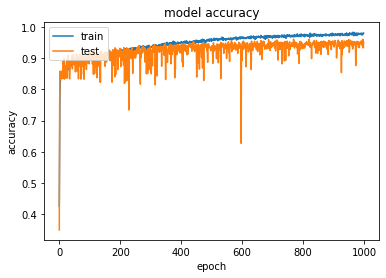

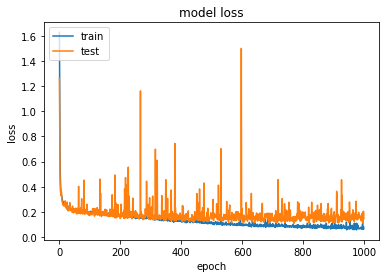

In [56]:
print(history1.history.keys())
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
history.history

{'loss': [1.621372938156128,
  1.1458256244659424,
  0.7838808298110962,
  0.6040056943893433,
  0.4816644787788391,
  0.4405907690525055,
  0.4274061322212219,
  0.38939741253852844,
  0.3718048632144928,
  0.35667702555656433,
  0.3269493877887726,
  0.33074742555618286,
  0.3108063340187073,
  0.31061071157455444,
  0.29421374201774597,
  0.3017352521419525,
  0.286801815032959,
  0.26742371916770935,
  0.28820642828941345,
  0.256865918636322,
  0.27299764752388,
  0.2675818204879761,
  0.25190478563308716,
  0.2605530023574829,
  0.2539798617362976,
  0.24876295030117035,
  0.24865499138832092,
  0.25539469718933105,
  0.24183157086372375,
  0.24466921389102936,
  0.24921825528144836,
  0.2476324886083603,
  0.23838376998901367,
  0.24041683971881866,
  0.23448748886585236,
  0.23676437139511108,
  0.23321036994457245,
  0.23329782485961914,
  0.23611228168010712,
  0.23831787705421448,
  0.23508571088314056,
  0.22333475947380066,
  0.22874325513839722,
  0.2258015125989914,
  0.

In [24]:
X1 = df3.iloc[:,0:256]
y1 = df3['target']
scaler = MinMaxScaler(feature_range=(0, 1))
X1 = scaler.fit_transform(X1)
X1 = pd.DataFrame(X1)
Y1 = pd.get_dummies(y1)
Y1

,1,2,3,4,5,6
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
3594,0,0,0,0,0,1
3595,0,0,0,0,0,1
3596,0,0,0,0,0,1
3597,0,0,0,0,0,1


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.25)
X_tr, X_t, y_tr, y_t = train_test_split(X, y, test_size=0.25)

num_classes = len(np.unique(y_t))
print(num_classes)

6


In [38]:
x = np.array(X[:])
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.38,random_state = 120)

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

input_shape=(x_train.shape[1], 1)
print(input_shape)

(256, 1)


In [39]:
model4 = Sequential()

model4.add(Conv1D(filters=32, kernel_size=3, input_shape=input_shape,activation='relu'))
model4.add(MaxPooling1D(pool_size=2))
model4.add(Conv1D(filters=32, kernel_size=10, padding='same', activation='relu'))
model4.add(MaxPooling1D(pool_size=2))
model4.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model4.add(Dense(32, activation='relu'))
model4.add(Dense(num_classes,activation='softmax'))

model4.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

history = model4.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_test, y_test), callbacks=[callbacks])

Epoch 1/25
93/93 [==============================] - 63s 676ms/step - loss: 1.5381 - accuracy: 0.2887 - val_loss: 1.2293 - val_accuracy: 0.3405
Epoch 2/25
93/93 [==============================] - 60s 641ms/step - loss: 1.1753 - accuracy: 0.4025 - val_loss: 1.1317 - val_accuracy: 0.4400
Epoch 3/25
93/93 [==============================] - 60s 643ms/step - loss: 1.0614 - accuracy: 0.4650 - val_loss: 1.0040 - val_accuracy: 0.4825
Epoch 4/25
93/93 [==============================] - 60s 650ms/step - loss: 0.8960 - accuracy: 0.5318 - val_loss: 0.7712 - val_accuracy: 0.6009
Epoch 5/25
93/93 [==============================] - 59s 635ms/step - loss: 0.7793 - accuracy: 0.5951 - val_loss: 0.7347 - val_accuracy: 0.5743
Epoch 6/25
93/93 [==============================] - 60s 647ms/step - loss: 0.6791 - accuracy: 0.6563 - val_loss: 0.5366 - val_accuracy: 0.7670
Epoch 7/25
93/93 [==============================] - 59s 636ms/step - loss: 0.6010 - accuracy: 0.7069 - val_loss: 0.5908 - val_accuracy: 0.6774

In [55]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 254, 32)           128       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 127, 32)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 127, 32)           10272     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 63, 32)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_14 (Dense)             (None, 32)                3232      
_________________________________________________________________
dense_15 (Dense)             (None, 6)                

In [42]:
history.history['val_accuracy']

[0.34046053886413574,
 0.4399670958518982,
 0.48245614767074585,
 0.6008771657943726,
 0.5742872953414917,
 0.7669956088066101,
 0.6773574352264404,
 0.8388158082962036,
 0.8963815569877625,
 0.890899121761322,
 0.9583333134651184,
 0.9725877046585083,
 0.9618969559669495,
 0.9769737124443054,
 0.9777960777282715,
 0.8733552694320679,
 0.9887609481811523,
 0.984100878238678,
 0.9912280440330505,
 0.9638158082962036,
 0.9827302694320679,
 0.9876644611358643,
 0.9627193212509155,
 0.9893091917037964,
 0.9942434430122375]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


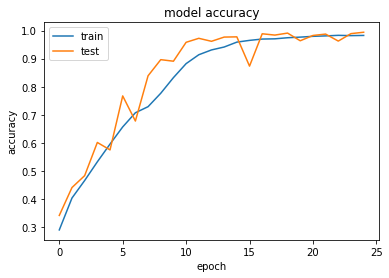

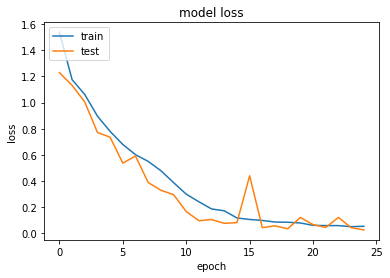

In [43]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
model4.save("dataset2_model_02.h5")

In [60]:
X.iloc[10,:]

0      0.340639
1      0.330110
2      0.348269
3      0.365160
4      0.403843
         ...   
251    0.297630
252    0.332080
253    0.308504
254    0.430463
255    0.460746
Name: 10, Length: 256, dtype: float64

In [61]:
single_test = X.iloc[10,:]
single_test = single_test.values.reshape(1,256)
print(single_test)
print(single_test.shape)
import time

[[0.34063853 0.33011035 0.34826892 0.36515992 0.40384296 0.39626589
  0.39109334 0.39809021 0.38180488 0.39602334 0.37898977 0.35498589
  0.44226363 0.38630667 0.4845772  0.45373149 0.49233897 0.47908132
  0.54430341 0.48476895 0.57099941 0.48772668 0.51875065 0.48823564
  0.47371193 0.44103919 0.4434554  0.47455567 0.40757766 0.48832206
  0.46036441 0.46502866 0.38333671 0.4103904  0.35387508 0.35737256
  0.27601677 0.28289307 0.25402367 0.19454737 0.13436359 0.08666306
  0.08516352 0.03339238 0.02468999 0.0306051  0.06444829 0.06741453
  0.11339657 0.14096606 0.16501333 0.18414779 0.19253059 0.2151681
  0.22352349 0.28818034 0.24753775 0.29688503 0.27738963 0.30432573
  0.30680502 0.34732708 0.33474407 0.34297939 0.34170355 0.3532642
  0.40268606 0.3513168  0.36337804 0.38209761 0.38579482 0.36940509
  0.37956968 0.40166954 0.39414668 0.37831889 0.41431842 0.37239522
  0.45487028 0.46038122 0.51261692 0.56947777 0.52273285 0.48886256
  0.49930205 0.52499338 0.57002806 0.48157125 0.46

In [62]:
from keras.models import load_model
modelFromFile1 = load_model('dataset2_model_0.h5')
modelFromFile1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 32)                8224      
_________________________________________________________________
dense_17 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 32)               

In [63]:
t1 = time.time()
print(modelFromFile1.predict_classes(single_test))
t2 = time.time()
print( 'Time taken was {} seconds'.format( t2 - t1))


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[0]
Time taken was 0.29725193977355957 seconds


In [66]:
from keras.models import load_model
modelFromFile2 = load_model('dataset2_model_02.h5')
modelFromFile2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 254, 32)           128       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 127, 32)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 127, 32)           10272     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 63, 32)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_14 (Dense)             (None, 32)                3232      
_________________________________________________________________
dense_15 (Dense)             (None, 6)                

In [65]:
X_train[1].shape
single_test1 = x_train[1]
single_test1 = single_test1.reshape(1,256)
print(single_test1.shape)

(1, 256)


In [70]:
i = x_train[12].reshape(1,256,1)
i.shape

(1, 256, 1)

In [71]:
t1 = time.time()
print(modelFromFile2.predict_classes(i))
t2 = time.time()
print( 'Time taken was {} seconds'.format( t2 - t1))

[3]
Time taken was 0.3078761100769043 seconds
